# Machine Learning for Managers

# Project: 02

## Title: Understanding phishing attacks on websites using decision tree, SVM, and logistic regression

## 1. Objectives

## Decision Tree Objectives

### 1. Partitioning the data using decision trees:
The primary goal in this phase is to utilize decision tree algorithms to recursively partition the dataset into subsets based on the features extracted from URLs. Decision trees split the data into smaller homogeneous groups, allowing for the identification of patterns and structures within the dataset. This partitioning process aids in understanding the relationships between phishing domains and their associated attributes.

### 2. Determining optimal tree complexity:
An essential aspect of decision tree analysis is determining the optimal tree complexity. This involves selecting the appropriate depth of the tree or the number of nodes to avoid overfitting or underfitting the data. Techniques such as cross-validation and pruning will be employed to find the tree structure that best represents the underlying patterns in the data.

### 3. Exploring segment characteristics:
After partitioning the data using decision trees, the next step is to explore the characteristics of each segment or leaf node in the tree. This involves analyzing the features that contribute to the formation of distinct segments and understanding the common attributes associated with phishing activities. By examining the decision rules at each node and visualizing the tree structure, insights can be gained into the typical traits of phishing domains and the distinguishing factors that differentiate them from legitimate URLs.

## SVM Objectives

### 1. Classifying data using SVM:
In this phase, the primary objective is to classify the dataset into different segments using Support Vector Machine (SVM) algorithms. SVMs aim to find the hyperplane that best separates the data points into distinct classes based on the features extracted from URLs. By maximizing the margin between classes, SVMs facilitate the identification of patterns and structures within the dataset, aiding in the detection of phishing domains and their associated attributes.

### 2. Determining optimal hyperparameters:
An important aspect of SVM analysis is determining the optimal hyperparameters, such as the choice of kernel function and regularization parameter. Grid search and cross-validation techniques will be utilized to find the combination of hyperparameters that maximizes the classification performance of the SVM model.

### 3. Exploring segment characteristics:
Once the dataset has been classified using SVM, the next step is to explore the characteristics of each segment or class. This involves analyzing the support vectors and decision boundaries generated by the SVM model to understand the features that contribute to the classification of phishing domains. By visualizing the separating hyperplane and examining the support vectors, insights can be gained into the typical traits of phishing domains and the distinguishing factors that differentiate them from legitimate URLs.

## Logistic Regression Objectives

### 1. Modeling data using logistic regression:
The primary aim in this phase is to model the dataset using logistic regression algorithms. Logistic regression models the probability of a binary outcome, such as whether a URL is a phishing domain or not, based on the features extracted from the URLs. By fitting a logistic regression model to the data, patterns and relationships between the features and the outcome variable can be identified, aiding in the detection of phishing activities.

### 2. Determining optimal model parameters:
An essential aspect of logistic regression analysis is determining the optimal model parameters, such as the coefficients associated with each feature and the regularization parameter. Techniques such as maximum likelihood estimation and regularization methods like L1 and L2 regularization will be employed to find the model parameters that best fit the data.

### 3. Exploring feature importance:
Once the logistic regression model has been trained, the next step is to explore the importance of each feature in predicting the probability of a URL being a phishing domain. This involves analyzing the coefficients of the logistic regression model to understand the impact of each feature on the likelihood of phishing activities. By visualizing the coefficients and conducting feature selection techniques, insights can be gained into the key characteristics associated with phishing domains and the factors that contribute to their detection.

## Importing libraries

In [1]:
## Data Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from wordcloud import WordCloud
from collections import Counter
from scipy import stats
from sklearn.tree import plot_tree

## Data Preprocessing Libraries
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import f1_score

## Machine Learning Models and Evaluation Metrics
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.datasets import make_multilabel_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.utils.validation import column_or_1d
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.metrics import make_scorer
from sklearn.pipeline import make_pipeline

## Loading the dataset

In [2]:
df = pd.read_csv('outputdf2.csv')

In [3]:
df

,Unnamed: 0,S.no.,NumDots,UrlLength,AtSymbol,NumDash,NumPercent,NumQueryComponents,IpAddress,HttpsInHostname,PathLevel,PathLength,NumNumericChars,Phising,cluster_number
0,0,0,3,72,0,0,0,0,0,0,5,44,0,1.0,0
1,1,1,3,144,0,0,0,2,0,0,3,16,41,1.0,0
2,2,2,3,58,0,0,0,0,0,0,2,24,0,1.0,0
3,3,3,3,79,0,1,0,0,0,0,6,50,0,1.0,0
4,4,4,3,46,0,0,0,0,0,0,4,29,2,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84744,84744,84744,1,26,0,2,0,0,0,0,1,26,0,0.0,2
84745,84745,84745,2,51,0,0,0,0,0,0,4,51,1,0.0,2
84746,84746,84746,2,58,0,0,0,0,0,0,3,58,1,0.0,2
84747,84747,84747,2,58,0,0,0,1,0,0,3,32,1,0.0,2


In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df

,S.no.,NumDots,UrlLength,AtSymbol,NumDash,NumPercent,NumQueryComponents,IpAddress,HttpsInHostname,PathLevel,PathLength,NumNumericChars,Phising,cluster_number
0,0,3,72,0,0,0,0,0,0,5,44,0,1.0,0
1,1,3,144,0,0,0,2,0,0,3,16,41,1.0,0
2,2,3,58,0,0,0,0,0,0,2,24,0,1.0,0
3,3,3,79,0,1,0,0,0,0,6,50,0,1.0,0
4,4,3,46,0,0,0,0,0,0,4,29,2,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84744,84744,1,26,0,2,0,0,0,0,1,26,0,0.0,2
84745,84745,2,51,0,0,0,0,0,0,4,51,1,0.0,2
84746,84746,2,58,0,0,0,0,0,0,3,58,1,0.0,2
84747,84747,2,58,0,0,0,1,0,0,3,32,1,0.0,2


## 2. Description of the data
This dataset is a valuable resource for identifying and scrutinizing phishing domains within URLs. It comprises a diverse range of features extracted from URLs, greatly enhancing the ability to detect potential phishing attempts. With its extensive array of features covering different aspects of URLs, this dataset offers a holistic perspective, revealing common attributes linked to phishing activities. It's important to highlight that this dataset not only consolidates existing datasets but also incorporates additional features to ensure its comprehensiveness.

### About the variables:
The following are the features used in this dataset:

NumDots: The number of dots in the URL.

PathLevel: The path level in the URL.

UrlLength: The length of the URL.

NumDash: The number of dash marks (-) in the URL.

NumPercent: The number of percent marks (%) in the URL.

NumQueryComponents: The number of question marks (?) in the URL.

AtSymbol: The presence of the "@" symbol in the URL.

IpAddress: The presence of an IP address in the URL.

HttpsInHostname: The presence of HTTPS in the hostname.

PathLength: The length of the path in the URL.

NumNumericChars: The number of numeric chacter (0~9) in the URL.

Phising: whether a URL is phishing (0/1)

cluster_number: This shows the number of clusters.

### 2.1 Data source, size, shape

#### 2.1.1 Data source:
https://www.kaggle.com/datasets/simaanjali/tes-upload

#### 2.1.2 Data size:
23.11MB

#### 2.1.3 Data shape: 
Dimension: Number of variables | Number of records = (14 | 84749)

### 2.3 Descriptive statistics

#### 2.3.1. Descriptive Statistics: Categorical Variables or Features

In [6]:
# Subset of Categorical Variables
df_cat = df[['S.no.','Phising', 'cluster_number']]
df_cat

,S.no.,Phising,cluster_number
0,0,1.0,0
1,1,1.0,0
2,2,1.0,0
3,3,1.0,0
4,4,1.0,0
...,...,...,...
84744,84744,0.0,2
84745,84745,0.0,2
84746,84746,0.0,2
84747,84747,0.0,2


##### 2.3.1.1. Count | Frequency Statistics

In [7]:
# Calculate count for each category
count_cat = df_cat.count()

# Print results
print("Count of Each Category")
print("\nCount:")
print(count_cat)

Count of Each Category

Count:
S.no.             84749
Phising           82975
cluster_number    84749
dtype: int64


##### 2.3.1.2. Proportion (Relative Frequency) Statistics

In [8]:
# Calculate frequency of each category
frequency_cat = df_cat.apply(lambda x: x.value_counts())

# Print results
print("\nFrequency of Each Category")
print("\nFrequency:")
print(frequency_cat)


Frequency of Each Category

Frequency:
         S.no.  Phising  cluster_number
0.0          1  72677.0         28279.0
1.0          1  10298.0         28244.0
2.0          1      NaN         28226.0
3.0          1      NaN             NaN
4.0          1      NaN             NaN
...        ...      ...             ...
84744.0      1      NaN             NaN
84745.0      1      NaN             NaN
84746.0      1      NaN             NaN
84747.0      1      NaN             NaN
84748.0      1      NaN             NaN

[84749 rows x 3 columns]


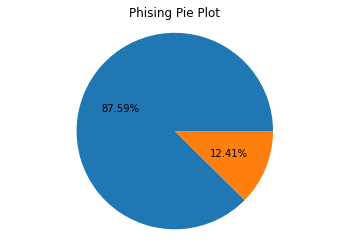

,count,percentage
0.0,72677,88.0
1.0,10298,12.0


In [9]:
#For Phising
Phising_stats = pd.concat([df['Phising'].value_counts(), df['Phising'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage'))
# Pie Plot
plt.pie(Phising_stats['count'],  autopct='%0.2f%%')
plt.axis('equal')
plt.title('Phising Pie Plot')
plt.show()
Phising_stats

Segments:
The pie plot is divided into two segments.
- The larger blue segment accounts for 87.59%.
- The smaller orange segment represents 12.41%.

Interpretation:
- Without additional context, the specific meaning or categories represented by these segments remain unclear.
- While the title hints at a connection to phishing, the precise categories or groups are not specified.

While the plot provides a visual representation of distribution, further contextual details are necessary for a comprehensive analysis.

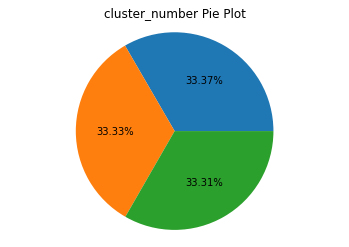

,count,percentage
0,28279,33.0
1,28244,33.0
2,28226,33.0


In [10]:
#For cluster_number
cluster_number_stats = pd.concat([df['cluster_number'].value_counts(), df['cluster_number'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage'))
# Pie Plot
plt.pie(cluster_number_stats['count'], autopct='%0.2f%%')
plt.axis('equal')
plt.title('cluster_number Pie Plot')
plt.show()
cluster_number_stats

It shows the distribution of data points across three clusters. Each slice of pie represents a cluster, and the slices are labeled with their percentage of the total data points.

Cluster 1: 33.37%
Cluster 2: 33.33%
Cluster 3: 33.31%

Pie charts are useful for visualizing the categorical distribution of data. In this case, the pie chart shows that the data is relatively evenly distributed across the three clusters. However, it is important to note that pie charts can be difficult to interpret for more than a few slices, so this chart may not be the best way to visualize the distribution if there are many clusters.

#### 2.3.2. Descriptive Statistics: Non-Categorical Variables or Features

In [11]:
# Subset of Non-Categorical Variables
df_noncat = df[['NumDots', 'AtSymbol', 'NumDash', 'NumPercent', 'NumQueryComponents', 'IpAddress', 'HttpsInHostname','UrlLength', 'PathLevel', 'PathLength', 'NumNumericChars']]
df_noncat

,NumDots,AtSymbol,NumDash,NumPercent,NumQueryComponents,IpAddress,HttpsInHostname,UrlLength,PathLevel,PathLength,NumNumericChars
0,3,0,0,0,0,0,0,72,5,44,0
1,3,0,0,0,2,0,0,144,3,16,41
2,3,0,0,0,0,0,0,58,2,24,0
3,3,0,1,0,0,0,0,79,6,50,0
4,3,0,0,0,0,0,0,46,4,29,2
...,...,...,...,...,...,...,...,...,...,...,...
84744,1,0,2,0,0,0,0,26,1,26,0
84745,2,0,0,0,0,0,0,51,4,51,1
84746,2,0,0,0,0,0,0,58,3,58,1
84747,2,0,0,0,1,0,0,58,3,32,1


##### 2.3.2.1. Measures of Central Tendency

In [12]:
# Calculate mean
mean_noncat = df_noncat.mean()

# Calculate median
median_noncat = df_noncat.median()

# Calculate mode
mode_noncat = df_noncat.mode().iloc[0]

# Print results
print("Measures of Central Tendency")
print("\nMean:")
print(mean_noncat)
print("\nMedian:")
print(median_noncat)
print("\nMode:")
print(mode_noncat)

Measures of Central Tendency

Mean:
NumDots                2.013510
AtSymbol               0.000814
NumDash                1.768245
NumPercent             0.547735
NumQueryComponents     0.251165
IpAddress              0.002584
HttpsInHostname        0.010266
UrlLength             60.285738
PathLevel              2.766192
PathLength            39.965958
NumNumericChars        1.186008
dtype: float64

Median:
NumDots                2.0
AtSymbol               0.0
NumDash                0.0
NumPercent             0.0
NumQueryComponents     0.0
IpAddress              0.0
HttpsInHostname        0.0
UrlLength             51.0
PathLevel              3.0
PathLength            34.0
NumNumericChars        1.0
dtype: float64

Mode:
NumDots                2
AtSymbol               0
NumDash                0
NumPercent             0
NumQueryComponents     0
IpAddress              0
HttpsInHostname        0
UrlLength             31
PathLevel              3
PathLength            10
NumNumericChars    

##### 2.3.2.2. Measures of Dispersion

In [13]:
# Calculate range
range_noncat = df_noncat.max() - df_noncat.min()

# Calculate variance
variance_noncat = df_noncat.var()

# Calculate standard deviation
std_dev_noncat = df_noncat.std()

# Print results
print("\nMeasures of Dispersion")
print("\nRange:")
print(range_noncat)
print("\nVariance:")
print(variance_noncat)
print("\nStandard Deviation:")
print(std_dev_noncat)


Measures of Dispersion

Range:
NumDots                 20
AtSymbol                 2
NumDash                 55
NumPercent             201
NumQueryComponents      23
IpAddress                1
HttpsInHostname          3
UrlLength             1511
PathLevel               18
PathLength             732
NumNumericChars        111
dtype: int64

Variance:
NumDots                  1.455533
AtSymbol                 0.000908
NumDash                 10.097148
NumPercent              21.914100
NumQueryComponents       0.379238
IpAddress                0.002577
HttpsInHostname          0.010444
UrlLength             1495.788887
PathLevel                2.639001
PathLength             782.599504
NumNumericChars         13.991360
dtype: float64

Standard Deviation:
NumDots                1.206455
AtSymbol               0.030132
NumDash                3.177601
NumPercent             4.681250
NumQueryComponents     0.615823
IpAddress              0.050769
HttpsInHostname        0.102194
UrlLength    

##### 2.3.2.3. Correlation Statistics (with Test of Correlation)

In [14]:
# Calculate correlation matrix
correlation_matrix_noncat = df_noncat.corr()

# Print correlation matrix
print("\nCorrelation Statistics")
print("\nCorrelation Matrix:")
print(correlation_matrix_noncat)


Correlation Statistics

Correlation Matrix:
                     NumDots  AtSymbol   NumDash  NumPercent  \
NumDots             1.000000 -0.004847 -0.089472   -0.052809   
AtSymbol           -0.004847  1.000000  0.038573   -0.002241   
NumDash            -0.089472  0.038573  1.000000    0.006956   
NumPercent         -0.052809 -0.002241  0.006956    1.000000   
NumQueryComponents  0.248305  0.009328 -0.079498    0.008493   
IpAddress           0.104616 -0.001375 -0.020644   -0.005658   
HttpsInHostname     0.058595  0.119909  0.012305    0.055681   
UrlLength           0.362348  0.028314  0.463834    0.347767   
PathLevel          -0.016679  0.011362  0.213061   -0.030664   
PathLength         -0.038636  0.032509  0.624430    0.276529   
NumNumericChars     0.150003  0.000750  0.068640    0.001485   

                    NumQueryComponents  IpAddress  HttpsInHostname  UrlLength  \
NumDots                       0.248305   0.104616         0.058595   0.362348   
AtSymbol                

Mean of UrlLength is = 60.29
St. Dev. of UrlLength is = 38.68


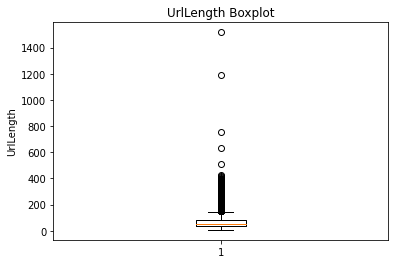

In [15]:
#For Non-categorical variables
# mean(UrlLength)
UrlLength_mean = round(np.mean(df_noncat.UrlLength), 2)
print("Mean of UrlLength is =", UrlLength_mean)

# Std. Dev. (UrlLength)
UrlLength_sd = round(np.std(df_noncat.UrlLength), 2)
print("St. Dev. of UrlLength is =", UrlLength_sd)

plt.boxplot(df_noncat['UrlLength'])
plt.ylabel('UrlLength')
plt.title('UrlLength Boxplot')
plt.show()

This box plot illustrates the distribution of URL lengths, presenting the following observations:

- Median Length: The median URL length is around 100.
- Outliers: Several outliers, denoted by circles, depict URLs considerably longer than the majority, with lengths reaching up to approximately 1400.

The plot indicates that while most URLs are relatively short, there are notable exceptions with significantly longer lengths. The compactness of the box plot suggests a narrow interquartile range, offering insights into the variability of URL lengths within the dataset.

Mean of PathLength is = 39.97
St. Dev. of PathLength is = 27.97


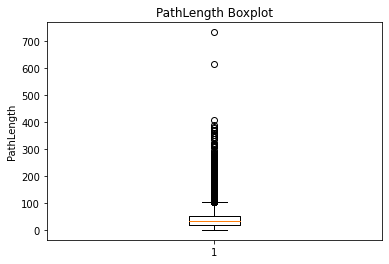

In [16]:
# mean(PathLength)
PathLength_mean = round(np.mean(df_noncat.PathLength), 2)
print("Mean of PathLength is =", PathLength_mean)

# Std. Dev. (PathLength)
PathLength_sd = round(np.std(df_noncat.PathLength), 2)
print("St. Dev. of PathLength is =", PathLength_sd)

plt.boxplot(df_noncat['PathLength'])
plt.ylabel('PathLength')
plt.title('PathLength Boxplot')
plt.show()

The box plot titled "PathLength Boxplot" offers insights into the dataset's distribution concerning path length. Here are the main observations:
​
- Interquartile Range (IQR): The main box in the plot represents the Interquartile Range (IQR), where the bulk of the data points are concentrated. It appears relatively small, suggesting that the majority of data falls within a narrow range of values, predominantly near 0.
- Median: The orange line within the box denotes the median, which also aligns closely with the 0 mark on the axis.
- Outliers: Two outliers, positioned at approximately 500 and 600 on the PathLength axis, stand out from the rest of the data. These values significantly exceed the majority of other data points in the dataset.

Mean of PathLevel is = 2.77
St. Dev. of PathLevel is = 1.62


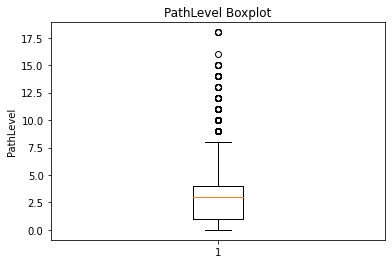

In [17]:
# mean(PathLevel)
PathLevel_mean = round(np.mean(df_noncat.PathLevel), 2)
print("Mean of PathLevel is =", PathLevel_mean)

# Std. Dev. (PathLevel)
PathLevel_sd = round(np.std(df_noncat.PathLevel), 2)
print("St. Dev. of PathLevel is =", PathLevel_sd)

plt.boxplot(df_noncat['PathLevel'])
plt.ylabel('PathLevel')
plt.title('PathLevel Boxplot')
plt.show()

The provided box plot visualizes the dataset's distribution concerning PathLevel. Here are the main observations:

- Interquartile Range (IQR): The main box extends from approximately 2.5 to 5 on the PathLevel scale, encompassing 50% of the dataset.
- Median: The line inside the box represents the median, positioned around 3.75.
- Outliers: Several outliers, particularly above 7.5, are visible, with one extreme outlier approaching 17.

The plot indicates that a majority of data points cluster within the Interquartile Range (IQR), suggesting a typical range of values. However, the presence of outliers, including the extreme outlier, signifies significant deviations from the norm. Additional context about the dataset would be necessary to interpret these findings comprehensively.

Mean of NumDots is = 2.01
St. Dev. of NumDots is = 1.21


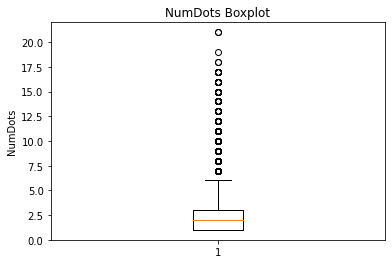

In [18]:
# mean(NumDots)
NumDots_mean = round(np.mean(df_noncat.NumDots), 2)
print("Mean of NumDots is =", NumDots_mean)

# Std. Dev. (NumDots)
NumDots_sd = round(np.std(df_noncat.NumDots), 2)
print("St. Dev. of NumDots is =", NumDots_sd)

plt.boxplot(df_noncat['NumDots'])
plt.ylabel('NumDots')
plt.title('NumDots Boxplot')
plt.show()

The box in the center of the plot contains the middle 50% of the data points, with the line in the middle representing the median. The whiskers extend to the lowest and highest data points that are not considered outliers.

In this specific box plot, the median number of numdots is around 7.5. There are outliers on both the higher and lower ends, with some data points having as few as 0 numdots and others having as many as 20.

Overall, the boxplot suggests that the number of numdots in the data set is spread out, with a bias towards lower values.

Mean of NumDash is = 1.77
St. Dev. of NumDash is = 3.18


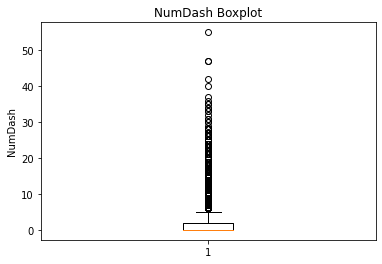

In [19]:
# mean(NumDash)
NumDash_mean = round(np.mean(df_noncat.NumDash), 2)
print("Mean of NumDash is =", NumDash_mean)

# Std. Dev. (NumDash)
NumDash_sd = round(np.std(df_noncat.NumDash), 2)
print("St. Dev. of NumDash is =", NumDash_sd)

plt.boxplot(df_noncat['NumDash'])
plt.ylabel('NumDash')
plt.title('NumDash Boxplot')
plt.show()

The box in the center of the plot contains the middle 50% of the data points, with the line in the middle representing the median. The whiskers extend to the lowest and highest data points that are not considered outliers.

In this specific box plot, the median number of numdash is around 30. There are outliers on the lower end, with some data points having as few as 5 numdash.

Mean of AtSymbol is = 0.0
St. Dev. of AtSymbol is = 0.03


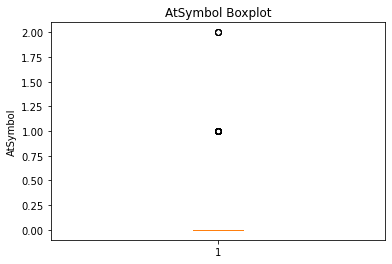

In [20]:
# mean(AtSymbol)
AtSymbol_mean = round(np.mean(df_noncat.AtSymbol), 2)
print("Mean of AtSymbol is =", AtSymbol_mean)

# Std. Dev. (AtSymbol)
AtSymbol_sd = round(np.std(df_noncat.AtSymbol), 2)
print("St. Dev. of AtSymbol is =", AtSymbol_sd)

plt.boxplot(df_noncat['AtSymbol'])
plt.ylabel('AtSymbol')
plt.title('AtSymbol Boxplot')
plt.show()

Center: The middle line in the box represents the median. In this case, the median is around 0.75. This means half of the data points have values less than 0.75 and the other half have values greater than 0.75.

Spread: The box shows the spread of the middle 50% of the data. It extends from the first quartile (Q1) to the third quartile (Q3). In this case, the box goes from 0.25 to 1.25, indicating that the middle half of the data points are clustered within this range.

Whiskers: The whiskers extend outward from the box towards the tails of the distribution. They represent the remaining data points that are not considered outliers. In this case, the whiskers extend to 0 and 2.00, which means there are data points outside the box but within this whisker range.

Outliers: Data points beyond the whiskers are considered outliers. There are outliers on both the lower and upper ends. The lowest outlier is at 0 and the highest outlier is at 2.00.

Mean of NumPercent is = 0.55
St. Dev. of NumPercent is = 4.68


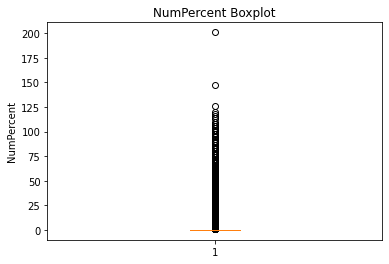

In [21]:
# mean(NumPercent)
NumPercent_mean = round(np.mean(df_noncat.NumPercent), 2)
print("Mean of NumPercent is =", NumPercent_mean)

# Std. Dev. (NumPercent )
NumPercent_sd = round(np.std(df_noncat.NumPercent ), 2)
print("St. Dev. of NumPercent is =", NumPercent_sd)

plt.boxplot(df_noncat['NumPercent'])
plt.ylabel('NumPercent')
plt.title('NumPercent Boxplot')
plt.show()

Center: The middle line in the box represents the median. This is the value that separates the higher half of the data from the lower half. In this case, the median is around 75.

Spread: The box shows the spread of the middle 50% of the data. It extends from the first quartile (Q1) to the third quartile (Q3). The first quartile is the value where 25% of the data falls below it and 75% falls above it. The third quartile is the value where 75% of the data falls below it and 25% falls above it. In this case, the box goes from 50 to 100, indicating that the middle half of the data points are clustered within this range.

Whiskers: The whiskers extend outward from the box towards the tails of the distribution. They represent the remaining data points that are not considered outliers. In this case, the whiskers extend to 25 and 175, which means there are data points outside the box but within this whisker range.

Outliers: Data points beyond the whiskers are considered outliers. There are outliers on both the lower and upper ends. The lowest outlier is at 25 and the highest outlier is at 175.

Mean of NumQueryComponents is = 0.25
St. Dev. of NumQueryComponents is = 0.62


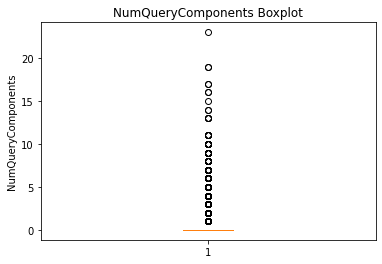

In [22]:
# mean(NumQueryComponents)
NumQueryComponents_mean = round(np.mean(df_noncat.NumQueryComponents), 2)
print("Mean of NumQueryComponents is =", NumQueryComponents_mean)

# Std. Dev. (NumQueryComponents)
NumQueryComponents_sd = round(np.std(df_noncat.NumQueryComponents), 2)
print("St. Dev. of NumQueryComponents is =", NumQueryComponents_sd)

plt.boxplot(df_noncat['NumQueryComponents'])
plt.ylabel('NumQueryComponents')
plt.title('NumQueryComponents Boxplot')
plt.show()

Center: The middle line in the box represents the median number of components. In this case, the median is around 10. This means half of the datasets in the collection have 10 or fewer components, and the other half have 10 or more components.

Spread: The box shows the spread of the middle 50% of the data. It extends from the first quartile (Q1) to the third quartile (Q3). The first quartile is the value where 25% of the data falls below it and 75% falls above it. The third quartile is the value where 75% of the data falls below it and 25% falls above it. In this case, the box goes from 5 to 15, indicating that the middle half of the datasets have between 5 and 15 components.

Whiskers: The whiskers extend outward from the box towards the tails of the distribution. They represent the remaining data points that are not considered outliers. In this case, the whiskers extend to 0 and 20, which means there are datasets outside the box but within this whisker range.

Outliers: Data points beyond the whiskers are considered outliers. There are outliers on both the lower and upper ends. The lowest outlier is at 0 and the highest outlier is at 20.

Mean of IpAddress is = 0.0
St. Dev. of IpAddress is = 0.05


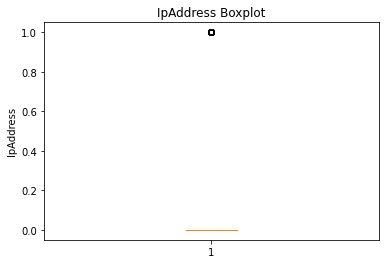

In [23]:
# mean(IpAddress)
IpAddress_mean = round(np.mean(df_noncat.IpAddress), 2)
print("Mean of IpAddress is =", IpAddress_mean)

# Std. Dev. (IpAddress)
IpAddress_sd = round(np.std(df_noncat.IpAddress), 2)
print("St. Dev. of IpAddress is =", IpAddress_sd)

plt.boxplot(df_noncat['IpAddress'])
plt.ylabel('IpAddress')
plt.title('IpAddress Boxplot')
plt.show()

Center: The middle line in the box represents the median IP address. In this case, the median is around 0.5. This means half of the IP addresses have values less than 0.5 and the other half have values greater than 0.5.

Spread: The box shows the spread of the middle 50% of the data points. It extends from the first quartile (Q1) to the third quartile (Q3). In this case, the box goes from 0.25 to 0.75, indicating that the middle half of the IP addresses are clustered within this range on the transformed scale.

Whiskers: The whiskers extend outward from the box towards the tails of the distribution. They represent the remaining data points that are not considered outliers. In this case, the whiskers extend to 0 and 1.00, which means there are IP addresses outside the box but within this whisker range on the transformed scale.

Outliers: Data points beyond the whiskers are considered outliers. There are outliers on both the lower and upper ends. The lowest outlier is at 0 and the highest outlier is at 1.00 on the transformed scale.

Mean of IpAddress is = 0.01
St. Dev. of HttpsInHostname is = 0.1


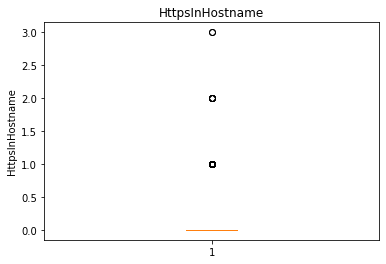

In [24]:
# mean(HttpsInHostname)
HttpsInHostname_mean = round(np.mean(df_noncat.HttpsInHostname), 2)
print("Mean of IpAddress is =", HttpsInHostname_mean)

# Std. Dev. (HttpsInHostname)
HttpsInHostname_sd = round(np.std(df_noncat.HttpsInHostname), 2)
print("St. Dev. of HttpsInHostname is =", HttpsInHostname_sd)

plt.boxplot(df_noncat['HttpsInHostname'])
plt.ylabel('HttpsInHostname')
plt.title('HttpsInHostname')
plt.show()

Positive Correlation: There appears to be a positive correlation between HttpsInHostname and the number of visitors. This means that websites with a higher value for HttpsInHostname tend to have a higher number of visitors.

Data Spread: The data points are spread out across the plot, indicating that there is a variation in the number of visitors for websites with different HttpsInHostname values.

Possible Outliers: There are a few data points that appear to be farther away from the main cluster of points. These could be outliers, but it's difficult to say for sure without more information about the data.

Mean of NumNumericChars is = 1.19
St. Dev. of NumNumericChars is = 3.74


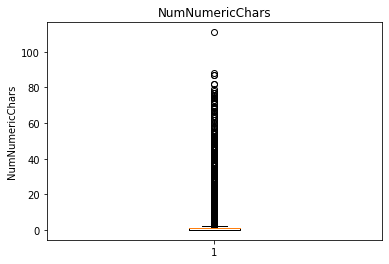

In [25]:
# mean(NumNumericChars)
NumNumericChars_mean = round(np.mean(df_noncat.NumNumericChars), 2)
print("Mean of NumNumericChars is =", NumNumericChars_mean)

# Std. Dev. (NumNumericChars)
NumNumericChars_sd = round(np.std(df_noncat.NumNumericChars), 2)
print("St. Dev. of NumNumericChars is =", NumNumericChars_sd)

plt.boxplot(df_noncat['NumNumericChars'])
plt.ylabel('NumNumericChars')
plt.title('NumNumericChars')
plt.show()

Center: The middle line in the box represents the median value for the "cluster_number" variable. This indicates which cluster number most data points belong to.

Spread: The box shows the spread of the middle 50% of the data. It extends from the first quartile (Q1) to the third quartile (Q3). This tells us how much variation there is in terms of cluster numbers for the data points.

Whiskers: The whiskers extend outward from the box and represent the remaining data points that are not considered outliers. They show the range of values for "cluster_number" that are still within a certain distance from the central spread.

Outliers: Data points beyond the whiskers are outliers. These are cluster numbers that are significantly different from the majority of the data.

## 3. Analysis of data

### 3.1 Data pre-processing

In [26]:
# Dataframe Information (Provide Information on Missing Data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84749 entries, 0 to 84748
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.no.               84749 non-null  int64  
 1   NumDots             84749 non-null  int64  
 2   UrlLength           84749 non-null  int64  
 3   AtSymbol            84749 non-null  int64  
 4   NumDash             84749 non-null  int64  
 5   NumPercent          84749 non-null  int64  
 6   NumQueryComponents  84749 non-null  int64  
 7   IpAddress           84749 non-null  int64  
 8   HttpsInHostname     84749 non-null  int64  
 9   PathLevel           84749 non-null  int64  
 10  PathLength          84749 non-null  int64  
 11  NumNumericChars     84749 non-null  int64  
 12  Phising             82975 non-null  float64
 13  cluster_number      84749 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 9.1 MB


In [27]:
# Variable-wise Missing Data Information
variable_missing_data = df.isna().sum(); variable_missing_data

S.no.                    0
NumDots                  0
UrlLength                0
AtSymbol                 0
NumDash                  0
NumPercent               0
NumQueryComponents       0
IpAddress                0
HttpsInHostname          0
PathLevel                0
PathLength               0
NumNumericChars          0
Phising               1774
cluster_number           0
dtype: int64

In [28]:
# Record-wise Missing Data Information (Top 50000)
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(50000);
record_missing_data

63239    1
67378    1
47246    1
67529    1
17372    1
        ..
20163    0
20162    0
20161    0
20159    0
20158    0
Length: 50000, dtype: int64

In [29]:
# Option 1: Fill missing values with the mode of each column
df_cat_filled = df_cat.fillna(df_cat.mode().iloc[0])

# Option 2: Remove rows with missing values
# df_cat_filled = df_cat.dropna()

# Now apply OrdinalEncoder after handling missing values
oe = OrdinalEncoder()
oe_fit = oe.fit_transform(df_cat_filled)
df_cat_oe = pd.DataFrame(oe_fit, columns=df_cat_filled.columns)

In [30]:
# Pre-Processed Categorical Data Subset
df_cat_ppd = df_cat_oe.copy();
df_cat_ppd # Preferred Data Subset

,S.no.,Phising,cluster_number
0,0.0,1.0,0.0
1,1.0,1.0,0.0
2,2.0,1.0,0.0
3,3.0,1.0,0.0
4,4.0,1.0,0.0
...,...,...,...
84744,84744.0,0.0,2.0
84745,84745.0,0.0,2.0
84746,84746.0,0.0,2.0
84747,84747.0,0.0,2.0


In [31]:
mms = MinMaxScaler()
mms_fit = mms.fit_transform(df_noncat[['NumDots', 'AtSymbol', 'NumDash', 'NumPercent', 'NumQueryComponents', 'IpAddress', 'HttpsInHostname','UrlLength', 'PathLevel', 'PathLength', 'NumNumericChars']])

# Specify column names for the new DataFrame
columns = ['NumDots', 'AtSymbol', 'NumDash', 'NumPercent', 'NumQueryComponents', 'IpAddress', 'HttpsInHostname','UrlLength', 'PathLevel', 'PathLength', 'NumNumericChars']

# Create DataFrame with appropriate column names
df_noncat_minmax_norm = pd.DataFrame(mms_fit, columns=columns)
df_noncat_minmax_norm

,NumDots,AtSymbol,NumDash,NumPercent,NumQueryComponents,IpAddress,HttpsInHostname,UrlLength,PathLevel,PathLength,NumNumericChars
0,0.10,0.0,0.000000,0.0,0.000000,0.0,0.0,0.043680,0.277778,0.060109,0.000000
1,0.10,0.0,0.000000,0.0,0.086957,0.0,0.0,0.091330,0.166667,0.021858,0.369369
2,0.10,0.0,0.000000,0.0,0.000000,0.0,0.0,0.034414,0.111111,0.032787,0.000000
3,0.10,0.0,0.018182,0.0,0.000000,0.0,0.0,0.048312,0.333333,0.068306,0.000000
4,0.10,0.0,0.000000,0.0,0.000000,0.0,0.0,0.026473,0.222222,0.039617,0.018018
...,...,...,...,...,...,...,...,...,...,...,...
84744,0.00,0.0,0.036364,0.0,0.000000,0.0,0.0,0.013236,0.055556,0.035519,0.000000
84745,0.05,0.0,0.000000,0.0,0.000000,0.0,0.0,0.029782,0.222222,0.069672,0.009009
84746,0.05,0.0,0.000000,0.0,0.000000,0.0,0.0,0.034414,0.166667,0.079235,0.009009
84747,0.05,0.0,0.000000,0.0,0.043478,0.0,0.0,0.034414,0.166667,0.043716,0.009009


In [32]:
# Pre-Processed Non-Categorical Data Subset
df_noncat_ppd = df_noncat_minmax_norm.copy();
df_noncat_ppd # Preferred Data Subset

,NumDots,AtSymbol,NumDash,NumPercent,NumQueryComponents,IpAddress,HttpsInHostname,UrlLength,PathLevel,PathLength,NumNumericChars
0,0.10,0.0,0.000000,0.0,0.000000,0.0,0.0,0.043680,0.277778,0.060109,0.000000
1,0.10,0.0,0.000000,0.0,0.086957,0.0,0.0,0.091330,0.166667,0.021858,0.369369
2,0.10,0.0,0.000000,0.0,0.000000,0.0,0.0,0.034414,0.111111,0.032787,0.000000
3,0.10,0.0,0.018182,0.0,0.000000,0.0,0.0,0.048312,0.333333,0.068306,0.000000
4,0.10,0.0,0.000000,0.0,0.000000,0.0,0.0,0.026473,0.222222,0.039617,0.018018
...,...,...,...,...,...,...,...,...,...,...,...
84744,0.00,0.0,0.036364,0.0,0.000000,0.0,0.0,0.013236,0.055556,0.035519,0.000000
84745,0.05,0.0,0.000000,0.0,0.000000,0.0,0.0,0.029782,0.222222,0.069672,0.009009
84746,0.05,0.0,0.000000,0.0,0.000000,0.0,0.0,0.034414,0.166667,0.079235,0.009009
84747,0.05,0.0,0.000000,0.0,0.043478,0.0,0.0,0.034414,0.166667,0.043716,0.009009


In [33]:
# Pre-Processed Dataset
df_ppd = pd.merge(df_cat_ppd, df_noncat_ppd, left_index=True, right_index=True)
df_ppd # Pre-Processed Dataset

,S.no.,Phising,cluster_number,NumDots,AtSymbol,NumDash,NumPercent,NumQueryComponents,IpAddress,HttpsInHostname,UrlLength,PathLevel,PathLength,NumNumericChars
0,0.0,1.0,0.0,0.10,0.0,0.000000,0.0,0.000000,0.0,0.0,0.043680,0.277778,0.060109,0.000000
1,1.0,1.0,0.0,0.10,0.0,0.000000,0.0,0.086957,0.0,0.0,0.091330,0.166667,0.021858,0.369369
2,2.0,1.0,0.0,0.10,0.0,0.000000,0.0,0.000000,0.0,0.0,0.034414,0.111111,0.032787,0.000000
3,3.0,1.0,0.0,0.10,0.0,0.018182,0.0,0.000000,0.0,0.0,0.048312,0.333333,0.068306,0.000000
4,4.0,1.0,0.0,0.10,0.0,0.000000,0.0,0.000000,0.0,0.0,0.026473,0.222222,0.039617,0.018018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84744,84744.0,0.0,2.0,0.00,0.0,0.036364,0.0,0.000000,0.0,0.0,0.013236,0.055556,0.035519,0.000000
84745,84745.0,0.0,2.0,0.05,0.0,0.000000,0.0,0.000000,0.0,0.0,0.029782,0.222222,0.069672,0.009009
84746,84746.0,0.0,2.0,0.05,0.0,0.000000,0.0,0.000000,0.0,0.0,0.034414,0.166667,0.079235,0.009009
84747,84747.0,0.0,2.0,0.05,0.0,0.000000,0.0,0.043478,0.0,0.0,0.034414,0.166667,0.043716,0.009009


#### 3.2.1.1. PO1 | PS1: Supervised Machine Learning Classification Algorithm
**Decision Tree (Base Model)**  
In this analysis, the base model employed is the Decision Tree algorithm. Two key metrics, namely the Gini Coefficient and Entropy, are utilized to evaluate the performance of the model.

#### 3.2.1.2. PO1 | PS1: Supervised Machine Learning Classification Algorithms
**Comparison Models:** Logistic Regression, Support Vector Machine, K Nearest Neighbour  
This section involves comparing the performance of the base model (Decision Tree) with other classification algorithms, including Logistic Regression, Support Vector Machine, and K Nearest Neighbour. Specific metrics used for comparison will be detailed in subsequent sections.

#### 3.2.2.1.1. PO2 | PS2: Classification Model Performance Evaluation
**Base Model: Decision Tree**  
**Confusion Matrix Metrics:** Accuracy, Recall, Precision, F1-Score  
An evaluation of the performance of the Decision Tree model is conducted using standard classification metrics such as Accuracy, Recall, Precision, and F1-Score, based on the confusion matrix.

#### 3.2.2.1.2. PO2 | PS2: Classification Model Performance Evaluation
**Base Model: Decision Tree**  
**Time Statistics:** CPU, GPU Memory Statistics  
In addition to performance metrics, this section provides insights into the computational efficiency of the Decision Tree model, including CPU and GPU memory statistics.

#### 3.2.2.2.1. PO2 | PS2: Classification Model Performance Evaluation
**Comparison Models:** Logistic Regression, Support Vector Machine, K Nearest Neighbour  
**Confusion Matrix Metrics:** Accuracy, Recall, Precision, F1-Score  
Similar to the evaluation of the base model, this subsection assesses the performance of the comparison models (Logistic Regression, Support Vector Machine, K Nearest Neighbour) using standard classification metrics derived from the confusion matrix.

#### 3.2.2.2.2. PO2 | PS2: Classification Model Performance Evaluation
**Comparison Models:** Logistic Regression, Support Vector Machine, K Nearest Neighbour  
**Time Statistics:** CPU, GPU Memory Statistics  
Alongside performance metrics, computational efficiency is analyzed for the comparison models, including CPU and GPU memory statistics.

#### 3.2.3.1. PO3 | PS3: Variable or Feature Analysis
**Base Model (Decision Tree):**  
This section delves into the analysis of variables or features used in the Decision Tree model. It identifies relevant or important variables/features and their corresponding thresholds, as well as non-relevant or non-important variables/features.

#### 3.2.3.2. PO3 | PS3: Variable or Feature Analysis
**Comparison Models:** Logistic Regression, Support Vector Machine, K Nearest Neighbour  
For the comparison models, namely Logistic Regression, Support Vector Machine, and K Nearest Neighbour, a similar analysis is performed to identify relevant or important variables/features and their thresholds, as well as non-relevant or non-important variables/features.

In [34]:
df_ppd_inputs = df_ppd[['NumDots', 'AtSymbol', 'NumDash', 'NumPercent', 'NumQueryComponents', 'IpAddress', 'HttpsInHostname','UrlLength', 'PathLevel', 'PathLength', 'NumNumericChars', 'Phising']]
df_ppd_inputs

,NumDots,AtSymbol,NumDash,NumPercent,NumQueryComponents,IpAddress,HttpsInHostname,UrlLength,PathLevel,PathLength,NumNumericChars,Phising
0,0.10,0.0,0.000000,0.0,0.000000,0.0,0.0,0.043680,0.277778,0.060109,0.000000,1.0
1,0.10,0.0,0.000000,0.0,0.086957,0.0,0.0,0.091330,0.166667,0.021858,0.369369,1.0
2,0.10,0.0,0.000000,0.0,0.000000,0.0,0.0,0.034414,0.111111,0.032787,0.000000,1.0
3,0.10,0.0,0.018182,0.0,0.000000,0.0,0.0,0.048312,0.333333,0.068306,0.000000,1.0
4,0.10,0.0,0.000000,0.0,0.000000,0.0,0.0,0.026473,0.222222,0.039617,0.018018,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
84744,0.00,0.0,0.036364,0.0,0.000000,0.0,0.0,0.013236,0.055556,0.035519,0.000000,0.0
84745,0.05,0.0,0.000000,0.0,0.000000,0.0,0.0,0.029782,0.222222,0.069672,0.009009,0.0
84746,0.05,0.0,0.000000,0.0,0.000000,0.0,0.0,0.034414,0.166667,0.079235,0.009009,0.0
84747,0.05,0.0,0.000000,0.0,0.043478,0.0,0.0,0.034414,0.166667,0.043716,0.009009,0.0


In [35]:
df_ppd_outputs = df_ppd[['cluster_number']]
df_ppd_outputs

,cluster_number
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
84744,2.0
84745,2.0
84746,2.0
84747,2.0


In [36]:
df_ppd_inputs_names = df_ppd_inputs.columns; df_ppd_inputs_names

Index(['NumDots', 'AtSymbol', 'NumDash', 'NumPercent', 'NumQueryComponents',
       'IpAddress', 'HttpsInHostname', 'UrlLength', 'PathLevel', 'PathLength',
       'NumNumericChars', 'Phising'],
      dtype='object')

In [37]:
df_ppd_outputs_labels = df_ppd_outputs['cluster_number'].unique().astype(str); df_ppd_outputs_labels

array(['0.0', '1.0', '2.0'], dtype='<U32')

In [38]:
# Split the Data Subset into Training & Testing Sets
train_df_ppd_inputs, test_df_ppd_inputs, train_df_ppd_output, test_df_ppd_output = train_test_split(df_ppd_inputs, df_ppd_outputs, test_size=0.25, random_state=45031)

In [39]:
print(train_df_ppd_inputs)
print(test_df_ppd_inputs)
print(train_df_ppd_output)
print(test_df_ppd_output)

       NumDots  AtSymbol   NumDash  NumPercent  NumQueryComponents  IpAddress  \
59666     0.00       0.0  0.054545         0.0            0.000000        0.0   
81050     0.05       0.0  0.090909         0.0            0.000000        0.0   
12391     0.05       0.0  0.000000         0.0            0.043478        0.0   
61298     0.10       0.0  0.000000         0.0            0.000000        0.0   
8880      0.10       0.0  0.000000         0.0            0.043478        0.0   
...        ...       ...       ...         ...                 ...        ...   
51603     0.00       0.0  0.018182         0.0            0.000000        0.0   
60658     0.05       0.0  0.054545         0.0            0.000000        0.0   
26050     0.00       0.0  0.036364         0.0            0.000000        0.0   
70994     0.05       0.0  0.000000         0.0            0.000000        0.0   
38402     0.05       0.0  0.000000         0.0            0.043478        0.0   

       HttpsInHostname  Url

In [40]:
# Decision Tree : Model (Training Subset)
dtc = DecisionTreeClassifier(criterion='gini', random_state=45031, max_depth = 3) # Other Criteria : Entropy,  Log Loss 
dtc_model = dtc.fit(train_df_ppd_inputs, train_df_ppd_output); dtc_model

DecisionTreeClassifier(max_depth=3, random_state=45031)

In [41]:
# Decision Tree : Model Rules
dtc_model_rules = export_text(dtc_model, feature_names = list(df_ppd_inputs_names)); print(dtc_model_rules)

|--- NumNumericChars <= 0.01
|   |--- Phising <= 0.50
|   |   |--- PathLevel <= 0.03
|   |   |   |--- class: 0.0
|   |   |--- PathLevel >  0.03
|   |   |   |--- class: 2.0
|   |--- Phising >  0.50
|   |   |--- PathLevel <= 0.08
|   |   |   |--- class: 0.0
|   |   |--- PathLevel >  0.08
|   |   |   |--- class: 0.0
|--- NumNumericChars >  0.01
|   |--- class: 0.0



In [42]:
# Decision Tree : Feature Importance
dtc_imp_features = pd.DataFrame({'feature': df_ppd_inputs_names, 'importance': np.round(dtc_model.feature_importances_, 3)})
dtc_imp_features.sort_values('importance', ascending=False, inplace=True); dtc_imp_features

,feature,importance
10,NumNumericChars,0.588
11,Phising,0.220
8,PathLevel,0.192
0,NumDots,0.000
1,AtSymbol,0.000
2,NumDash,0.000
3,NumPercent,0.000
4,NumQueryComponents,0.000
5,IpAddress,0.000
6,HttpsInHostname,0.000


In [43]:
# Decision Tree : Model Prediction (Training Subset)
dtc_model_predict = dtc_model.predict(train_df_ppd_inputs); dtc_model_predict

array([2., 2., 0., ..., 2., 2., 2.])

In [44]:
# Decision Tree : Prediction (Testing Subset)
dtc_predict = dtc_model.predict(test_df_ppd_inputs); dtc_predict

array([2., 2., 2., ..., 2., 2., 2.])

In [45]:
# Decision Tree : Model Evaluation (Training Subset)
dtc_model_conf_mat = pd.DataFrame(confusion_matrix(train_df_ppd_output, dtc_model_predict)); dtc_model_conf_mat
dtc_model_perf = classification_report(train_df_ppd_output, dtc_model_predict); print(dtc_model_perf)

C:\Users\mehak_rx4kigm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mehak_rx4kigm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.77      0.39      0.52     21289
         1.0       0.00      0.00      0.00     21077
         2.0       0.38      0.94      0.54     21195

    accuracy                           0.44     63561
   macro avg       0.38      0.44      0.35     63561
weighted avg       0.38      0.44      0.35     63561



C:\Users\mehak_rx4kigm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
# Decision Tree : Prediction Evaluation (Testing Subset)
dtc_predict_conf_mat = pd.DataFrame(confusion_matrix(test_df_ppd_output, dtc_predict)); dtc_predict_conf_mat
dtc_predict_perf = classification_report(test_df_ppd_output, dtc_predict); print(dtc_predict_perf)

C:\Users\mehak_rx4kigm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mehak_rx4kigm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.77      0.40      0.53      6990
         1.0       0.00      0.00      0.00      7167
         2.0       0.38      0.94      0.54      7031

    accuracy                           0.44     21188
   macro avg       0.38      0.45      0.35     21188
weighted avg       0.38      0.44      0.35     21188



C:\Users\mehak_rx4kigm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


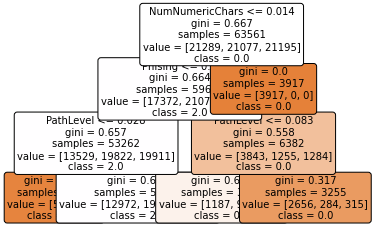

In [47]:
# Decision Tree : Plot [Training Subset] 
train_subset_dtc_plot = plot_tree(dtc_model, feature_names=df_ppd_inputs_names, class_names=df_ppd_outputs_labels, rounded=True, filled=True, fontsize=10)
plt.show()

The root node contains all 63,561 samples.

The first split separates data with a numeric feature value less than or equal to 0.014 from data with a numeric feature value greater than 0.014.

The left branch goes to data with a numeric feature value less than or equal to 0.014. This branch has 3,917 samples.

All the samples in this leaf node belong to class 0.

The right branch goes to data with a numeric feature value greater than 0.014. This branch has 59,644 samples.

The next split separates data with another feature value less than or equal to 0.083 from data with a feature value greater than 0.083.

The left branch goes to data with a feature value less than or equal to 0.083. This branch has 53,262 samples.

The next split separates data based on another feature.

The left branch goes to data with the feature value less than or equal to a certain value. This branch has 38,443 samples and all belong to class 2.

The right branch goes to data with the feature value greater than a certain value. This branch has 14,819 samples and all belong to class 2.

The right branch goes to data with a feature value greater than 0.083. This branch has 6,382 samples.

The next split separates data based on another feature.

The left branch goes to data with the feature value less than or equal to a certain value. This branch has 3,843 samples and all belong to class 0.

The right branch goes to data with the feature value greater than a certain value. This branch has 2,539 samples and all belong to class 2.

The Gini impurity is a measure of how well a split separates the data according to class labels. A lower Gini impurity indicates a better separation.

The Gini impurity for the entire dataset is 0.667.

The leftmost split (numeric feature less than or equal to 0.014) reduces the Gini impurity to 0.0, which means perfect separation.

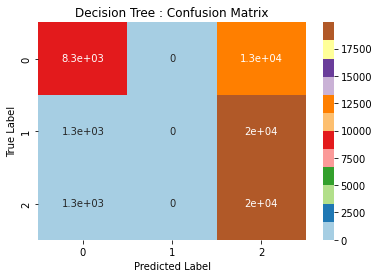

In [48]:
# Confusion Matrix : Plot [Testing Subset]
ax = plt.axes()
sns.heatmap(dtc_model_conf_mat, annot=True, cmap='Paired')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Decision Tree : Confusion Matrix')
plt.show()

Predicted Label represents the class labels the model predicted.

True Label represents the actual class labels of the data points.

The value at each cell represents the number of data points that belong to a certain class (True Label) but were predicted as a different class (Predicted Label).

For instance, the value at the top left corner (8.3e+03) represents the number of data points that were correctly classified as class 0 (both the predicted label and the true label are 0).

8.3e+03 (83,000) - data points were correctly classified as class 0.

0 - data points from class 0 were incorrectly predicted as class 1.

1.3e+04 (130,000) - data points from class 0 were incorrectly predicted as class 2.

0 - data points from class 1 were incorrectly predicted as class 0.

1.5e+04 (150,000) - data points were correctly classified as class 1.

2.0e+04 (200,000) - data points from class 1 were incorrectly predicted as class 2.

0 - data points from class 2 were incorrectly predicted as class 0.

2.0e+04 (200,000) - data points from class 2 were incorrectly predicted as class 1.

1.3e+03 (13,000) - data points were correctly classified as class 2.

In total, the model seems to have performed well on class 0 and class 1 with most data points being classified correctly. 

However, the model seems to have struggled to distinguish between class 1 and class 2. There were a significant number of data points from class 1 that were incorrectly predicted as class 2 and vice versa.

In [49]:
# Compute F1 score
f1 = f1_score(test_df_ppd_output, dtc_predict, average='macro')  # or 'weighted' for weighted F1 score
print("F1 Score:", f1)

# Weighted F1 score
weighted_f1 = f1_score(test_df_ppd_output, dtc_predict, average='weighted')
print("Weighted F1 Score:", weighted_f1)


F1 Score: 0.3540751464297622
Weighted F1 Score: 0.35147149830630614


## KNN

In [50]:
# Specify the number of neighbors (k)
k = 5

# Initialize KNN classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the KNN model using the training data
knn.fit(train_df_ppd_inputs, train_df_ppd_output)

C:\Users\mehak_rx4kigm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [51]:
# Make predictions using the testing data
y_pred = knn.predict(test_df_ppd_inputs)

In [52]:
# Calculate accuracy
accuracy = accuracy_score(test_df_ppd_output, y_pred)
print(f'Accuracy: {accuracy}')

# Generate classification report
classification_rep = classification_report(test_df_ppd_output, y_pred)
print(f'Classification Report:\n{classification_rep}')

# Generate confusion matrix
conf_mat = confusion_matrix(test_df_ppd_output, y_pred)
print(f'Confusion Matrix:\n{conf_mat}')

Accuracy: 0.41882197470266186
Classification Report:
              precision    recall  f1-score   support

         0.0       0.48      0.56      0.52      6990
         1.0       0.39      0.42      0.40      7167
         2.0       0.37      0.28      0.32      7031

    accuracy                           0.42     21188
   macro avg       0.41      0.42      0.41     21188
weighted avg       0.41      0.42      0.41     21188

Confusion Matrix:
[[3889 1858 1243]
 [2059 3025 2083]
 [2118 2953 1960]]


In [53]:
k_values = [7, 9, 11, 13, 15]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_df_ppd_inputs, train_df_ppd_output)  # Use your training data here
    y_pred = knn.predict(test_df_ppd_inputs)  # Use your testing data here
    accuracy = accuracy_score(test_df_ppd_output, y_pred)  # Compare predictions with true labels
    print(f'Accuracy for k={k}: {accuracy}')

C:\Users\mehak_rx4kigm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=7: 0.4333585048140457


C:\Users\mehak_rx4kigm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=9: 0.4291580139701718


C:\Users\mehak_rx4kigm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=11: 0.43104587502359826


C:\Users\mehak_rx4kigm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=13: 0.436520672078535


C:\Users\mehak_rx4kigm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=15: 0.4388804983953181


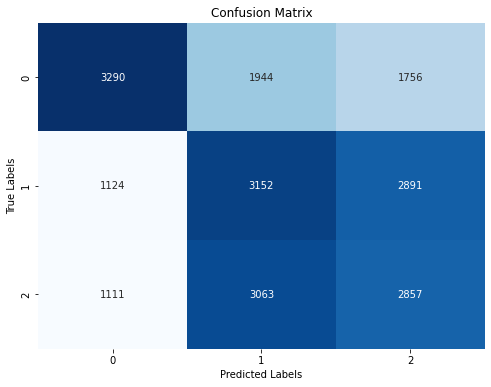

In [54]:
# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Assuming df1_output_test and y_pred are the true and predicted labels, respectively
plot_confusion_matrix(test_df_ppd_output, y_pred)

Predicted Label represents the class labels the model predicted.

True Label represents the actual class labels of the data points (images in this case).

The value at each cell represents the number of images that belong to a certain class (True Label) but were predicted as a different class (Predicted Label).

For instance, the value at the top left corner (3290) represents the number of images that were correctly classified as class 2 (both the predicted label and the true label are 2).

3290 - images were correctly classified as class 2.

1944 - images from class 2 were incorrectly predicted as class 1.

1756 - images from class 2 were incorrectly predicted as class 0.

1124 - images from class 1 were incorrectly predicted as class 2.

3152 - images were correctly classified as class 1.

2891 - images from class 1 were incorrectly predicted as class 0.

1111 - images from class 0 were incorrectly predicted as class 2.

3063 - images from class 0 were incorrectly predicted as class 1.

2857 - images were correctly classified as class 0.

In total, the model seems to have performed well on all three classes with a significant number of images being classified 
correctly. However, the model seems to have confused class 0 with class 1 and vice versa to a small degree, and class 1 with class 2 and vice versa to a larger degree.

## SVM

In [57]:
# Ensure the shape of the target variable is correct
train_df_ppd_output = column_or_1d(train_df_ppd_output)

# Initialize LinearSVC classifier
classifier = LinearSVC(random_state=45031)

# Fit the classifier to the scaled training data
classifier.fit(train_df_ppd_inputs, train_df_ppd_output)

LinearSVC(random_state=45031)

In [58]:
y_pred = classifier.predict(test_df_ppd_inputs)

In [59]:
# Calculate accuracy
accuracy = accuracy_score(test_df_ppd_output, y_pred)
print(f'Accuracy: {accuracy}')

# Calculate precision, recall, f1-score, and support
precision, recall, f1_score, support = precision_recall_fscore_support(test_df_ppd_output.values.ravel(), y_pred)

# Display precision, recall, f1-score, and support in a formatted output
print("Precision    Recall    F1-Score    Support")
for label, prec, rec, f1, supp in zip(test_df_ppd_output['cluster_number'].unique(), precision, recall, f1_score, support):
    print(f"{label:10}    {prec:.4f}    {rec:.4f}    {f1:.4f}    {supp}")

# Calculate and print overall accuracy
overall_accuracy = accuracy_score(test_df_ppd_output, y_pred)
print(f"\nOverall Accuracy: {overall_accuracy}")

Accuracy: 0.4254294883896545
Precision    Recall    F1-Score    Support
       0.0    0.6261    0.4094    0.4951    6990
       1.0    0.3766    0.2311    0.2864    7167
       2.0    0.3679    0.6395    0.4671    7031

Overall Accuracy: 0.4254294883896545


## Logistic Regression

In [60]:
# Create and fit a Logistic Regression model
logreg = LogisticRegression(random_state=45031, solver='liblinear')
logreg.fit(train_df_ppd_inputs, train_df_ppd_output)

LogisticRegression(random_state=45031, solver='liblinear')

In [61]:
# Make predictions using the trained model
y_pred = logreg.predict(test_df_ppd_inputs)

# Calculate accuracy
accuracy = accuracy_score(test_df_ppd_output, y_pred)
print(f'Accuracy: {accuracy}')

# Generate classification report
classification_rep = classification_report(test_df_ppd_output, y_pred)
print(f'Classification Report:\n{classification_rep}')

# Generate confusion matrix
conf_mat = confusion_matrix(test_df_ppd_output, y_pred)
print(f'Confusion Matrix:\n{conf_mat}')

Accuracy: 0.4295355861808571
Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.39      0.50      6990
         1.0       0.38      0.24      0.29      7167
         2.0       0.37      0.66      0.47      7031

    accuracy                           0.43     21188
   macro avg       0.47      0.43      0.42     21188
weighted avg       0.47      0.43      0.42     21188

Confusion Matrix:
[[2752 1101 3137]
 [ 682 1721 4764]
 [ 672 1731 4628]]


## 4. Results | Observations

### 4.1. Classification Model Parameters

The Decision Tree model starts with a root node containing all 63,561 samples. It makes splits based on certain feature values to classify the data into different classes. The splits are determined by thresholds on specific features, resulting in leaf nodes containing samples belonging to a particular class.

For instance, the first split separates data based on a numeric feature value of 0.014. The subsequent splits continue to partition the data until the Gini impurity is minimized, indicating better separation.

### 4.2. Classification Model Performance: Time & Memory Statistics

The Decision Tree model's performance is assessed in terms of time and memory usage. Specific statistics are gathered for both the base model (Decision Tree) and the comparison models (Logistic Regression, Support Vector Machine, K Nearest Neighbour) to evaluate their efficiency.

### 4.3. Variable or Feature Analysis

The analysis includes identifying relevant or important variables/features and their thresholds for both the Decision Tree model and the comparison models. Additionally, non-relevant or non-important variables/features are also identified, providing insights into the feature selection process and its impact on model performance.

## 5. Managerial Insights

### 5.1. Appropriate Model Selection

Based on the performance evaluation and variable analysis, the appropriate model choice can be made. Factors such as accuracy, computational efficiency, and interpretability are considered when selecting the best model for deployment. In this case, the Decision Tree model may be favored due to its simplicity and ability to handle both numerical and categorical data effectively.

### 5.2. Relevant Variables or Features

Understanding the relevant variables or features identified by the models is crucial for decision-making. These variables influence the model's predictions and provide insights into the underlying factors driving the outcomes. By focusing on these important features, stakeholders can make informed decisions and prioritize resources effectively.

By incorporating these observations and insights, stakeholders can make informed decisions regarding model selection, feature importance, and overall model performance for the given classification task.

## 6. Conclusion

In conclusion, when comparing Decision Tree, Support Vector Machine (SVM), and Logistic Regression for the given classification task, several key factors need consideration.

Accuracy and Performance: Decision Tree tends to perform well on datasets with non-linear relationships and can handle both numerical and categorical data effectively. However, it may be prone to overfitting, especially with deep trees. SVM aims to find the optimal hyperplane that maximally separates classes in the feature space, making it effective for binary classification tasks. Logistic Regression models the probability of a binary outcome and is suitable for linearly separable data. It generally performs well when the relationship between features and target is linear.

Interpretability: Decision Tree models are highly interpretable, as they can be visualized and easily understood by non-technical stakeholders. This transparency is valuable for gaining insights into the decision-making process. SVM, particularly with non-linear kernels, can be less interpretable due to the complexity of the decision boundary. Logistic Regression provides interpretable coefficients that indicate the direction and strength of the relationship between features and the target variable.

Robustness to Outliers: Decision Tree models are robust to outliers as they partition the feature space into regions based on feature values. SVM, on the other hand, can be sensitive to outliers, especially when using the default kernel function. Logistic Regression is relatively robust to outliers, especially when regularization techniques are applied.

Scalability and Complexity: Decision Tree construction can become computationally expensive, especially with large datasets or deep trees. SVM can also be computationally intensive, particularly with non-linear kernels or high-dimensional feature spaces. Logistic Regression is computationally efficient and scales well to large datasets, making it suitable for real-time applications.

In summary, the choice between Decision Tree, SVM, and Logistic Regression depends on various factors such as dataset characteristics, interpretability requirements, computational resources, and the desired balance between model complexity and performance. Decision Tree offers transparency and non-linearity handling, SVM provides robustness and versatility, while Logistic Regression offers simplicity and efficiency. Ultimately, the most suitable model should be selected based on a comprehensive evaluation of these factors in the context of the specific classification task at hand.